# p-Hacking and Multiple Comparisons Bias


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Refresher: Spearman Rank Correlation


In [2]:
X = pd.Series(np.random.normal(0, 1, 100))
Y = X

r_s = stats.spearmanr(Y, X)
print(f"Spearman Rank Coefficient: {r_s[0]}")
print(f"p-value: {r_s[1]}")

Spearman Rank Coefficient: 0.9999999999999999
p-value: 0.0


In [3]:
X = pd.Series(np.random.normal(0, 1, 100))
Y = X + np.random.normal(0, 1, 100)

r_s = stats.spearmanr(Y, X)
print(f"Spearman Rank Coefficient: {r_s[0]}")
print(f"p-value: {r_s[1]}")

Spearman Rank Coefficient: 0.7144794479447945
p-value: 7.012475899458552e-17


# The Cutoff is our Significance Level


In [5]:
# Setting a cutoff of 5% means that there is a 5% chance
# of us getting a significant p-value given no relationship
# in our data (false positive).
# NOTE: This is only true if the test's assumptions have been
# satisfied and the test is therefore properly calibrated.
# All tests have different assumptions.
cutoff = 0.05

X = pd.Series(np.random.normal(0, 1, 100))
Y = X + np.random.normal(0, 1, 100)

r_s = stats.spearmanr(Y, X)
print(f"Spearman Rank Coefficient: {r_s[0]}")
if r_s[1] < cutoff:
    print('There is significant evidence of a relationship.')
else:
    print('There is not significant evidence of a relationship.')


Spearman Rank Coefficient: 0.573045304530453
There is significant evidence of a relationship.


# Experiment - Running Many Tests


In [6]:
df = pd.DataFrame()


In [8]:
N = 20
T = 100

for i in range(N):
    X = np.random.normal(0, 1, T)
    X = pd.Series(X)
    name = 'X%s' % i
    df[name] = X

In [9]:
df.head()


,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,-1.248791,0.237195,2.211563,-1.732819,-0.245454,0.787606,-0.353795,-0.579237,-1.366869,0.970738,0.788199,0.448499,-0.649607,-0.404157,-2.170751,-0.470263,-0.516125,-0.019119,-0.883370,-0.777231
1,-1.192604,0.327010,-2.233133,-1.704595,-0.670327,-0.954074,2.669259,0.128330,1.893991,0.554973,-1.374288,-0.948760,-0.051189,0.341096,-0.091808,0.330828,0.312265,1.489932,-0.978614,0.991763
2,0.069427,-0.422746,-0.027951,1.299041,0.487361,-1.435274,-0.928141,-0.619229,1.201336,-0.089899,1.159799,-1.004584,1.220776,2.310777,-1.495932,1.869960,-1.048653,-0.068101,-0.355382,0.006243
3,-1.587502,0.570948,-0.792282,1.039504,0.016562,-1.155753,0.707875,2.132091,-0.067183,-0.297926,-1.814770,0.125735,0.474326,-2.017866,0.729091,0.321004,0.087277,-1.784576,0.128036,-1.457122
4,0.805778,0.363786,-1.628925,-1.664193,-1.853713,0.085313,0.168677,0.133348,-0.848517,-1.057612,0.530087,0.705955,-0.439043,2.150786,0.613955,-0.311086,-1.329766,-1.235197,-0.874827,-0.188029


In [14]:
cutoff = 0.05

significant_pairs = []

for i in range(N):
    for j in range(i+1, N):
        Xi = df.iloc[:, i]
        Xj = df.iloc[:, j]
        
        results = stats.spearmanr(Xi, Xj)
        
        pvalue = results[1]
        
        if pvalue < cutoff:
            significant_pairs.append((i, j))

In [15]:
(N * (N-1) / 2) * 0.05

9.5

In [16]:
len(significant_pairs)

13

# Repeating the Experiment


In [17]:
def do_experiment(N, T, cutoff=0.05):
    df = pd.DataFrame()

    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    significant_pairs = []

    # Look for relationships
    for i in range(N):
        for j in range(i+1, N):
            Xi = df.iloc[:, i]
            Xj = df.iloc[:, j]

            results = stats.spearmanr(Xi, Xj)

            pvalue = results[1]

            if pvalue < cutoff:
                significant_pairs.append((i, j))
    
    return significant_pairs


num_experiments = 100

results = np.zeros((num_experiments,))

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=0.05)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

In [ ]:
np.mean(results) # np.float64(9.64)

np.float64(9.64)

# Visualizing What's Going On


In [20]:
def get_pvalues_from_experiment(N, T):
    df = pd.DataFrame()

    # Make random data
    for i in range(N):
        X = np.random.normal(0, 1, T)
        X = pd.Series(X)
        name = 'X%s' % i
        df[name] = X

    pvalues = []

    # Look for relationships
    for i in range(N):
        for j in range(i+1, N):
            Xi = df.iloc[:, i]
            Xj = df.iloc[:, j]

            results = stats.spearmanr(Xi, Xj)

            pvalue = results[1]

            pvalues.append(pvalue)
    
    return pvalues

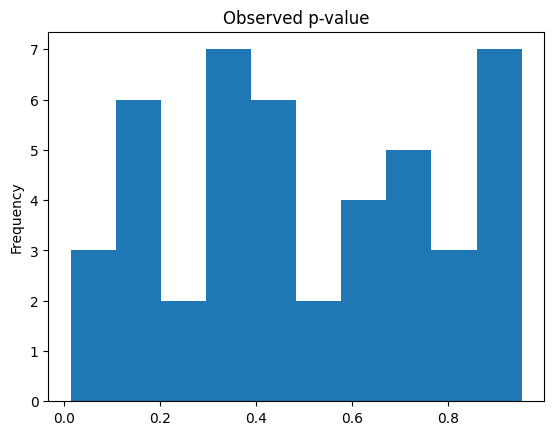

In [21]:
pvalues = get_pvalues_from_experiment(10, 100)
plt.hist(pvalues)
plt.ylabel('Frequency')
plt.title('Observed p-value');

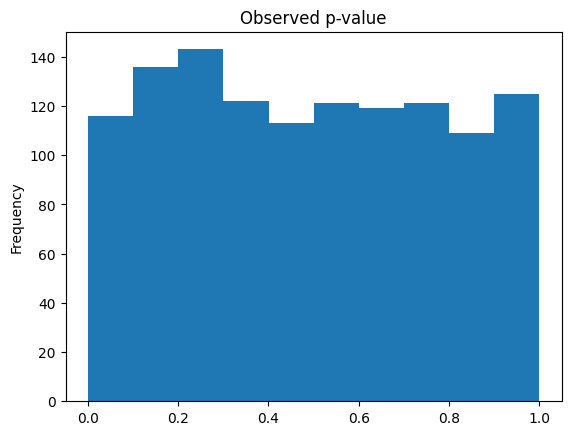

In [22]:
pvalues = get_pvalues_from_experiment(50, 100)
plt.hist(pvalues)
plt.ylabel('Frequency')
plt.title('Observed p-value');

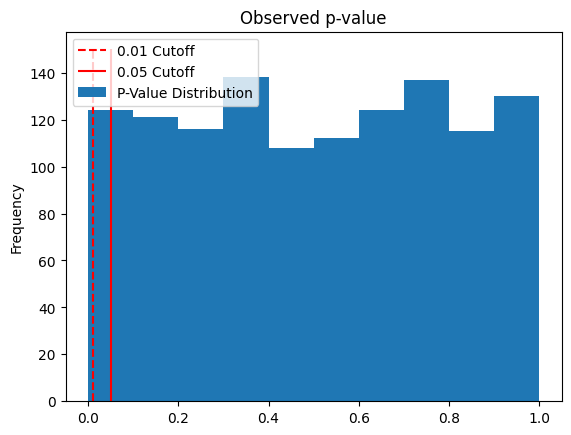

In [23]:
pvalues = get_pvalues_from_experiment(50, 100)
plt.vlines(0.01, 0, 150, colors='r', linestyle='--', label='0.01 Cutoff')
plt.vlines(0.05, 0, 150, colors='r', label='0.05 Cutoff')
plt.hist(pvalues, label='P-Value Distribution')
plt.legend()
plt.ylabel('Frequency')
plt.title('Observed p-value');

In [24]:
num_experiments = 100

results = np.zeros((num_experiments,))

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=0.01)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

In [25]:

np.mean(results)

np.float64(2.08)

# Example: Bon Ferroni Correction



In [26]:
num_experiments = 100

results = np.zeros((num_experiments,))

N = 20

T = 100

desired_level = 0.05

num_tests = N * (N - 1) / 2

new_cutoff = desired_level / num_tests

for i in range(num_experiments):
    # Run a single experiment
    result = do_experiment(20, 100, cutoff=new_cutoff)
    
    # Count how many pairs
    n = len(result)
    
    # Add to array
    results[i] = n

In [27]:

np.mean(results)

np.float64(0.06)